In [1]:
from sklearn.datasets import load_boston, load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
boston = load_boston()

In [2]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

In [3]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [6]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pipe = make_pipeline(StandardScaler(),
                     PCA(n_components = 2))

## Accessing the attributes of the pipeline steps

In [7]:
pipe.steps

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('pca',
  PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False))]

## Getting a specific step once you know what you want

In [8]:
pipe.named_steps.standardscaler

StandardScaler(copy=True, with_mean=True, with_std=True)

## Parameter Grid, Grid search & pipeline

In [9]:
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, RepeatedKFold

pipe = make_pipeline(StandardScaler(), 
                    PolynomialFeatures(),
                    Ridge())


In [10]:
param_grid = {'polynomialfeatures__degree':[1,2,3],
              'ridge__alpha': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid = param_grid, cv=5, n_jobs=-1, return_train_score=True)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

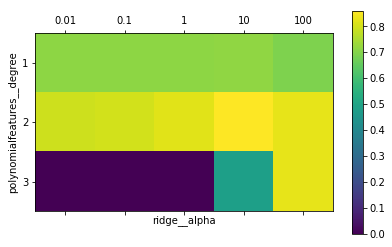

In [11]:
plt.matshow(grid.cv_results_['mean_test_score'].reshape(3,-1), vmin = 0, cmap='viridis')
plt.xlabel('ridge__alpha')
plt.ylabel('polynomialfeatures__degree')
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),
param_grid['polynomialfeatures__degree'])
plt.colorbar()

In [12]:
res = pd.DataFrame(grid.cv_results_)
res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028802,0.014498,0.0008,4.000664e-04,1,0.01,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.735227,0.641516,0.764229,...,0.715865,0.053933,10,0.747220,0.768196,0.738330,0.737856,0.761599,0.750640,0.012288
1,0.044003,0.046988,0.0012,3.999472e-04,1,0.1,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.735240,0.641585,0.764131,...,0.715887,0.053917,9,0.747219,0.768196,0.738329,0.737856,0.761599,0.750640,0.012288
2,0.010201,0.013906,0.0008,4.000425e-04,1,1,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.735349,0.642259,0.763173,...,0.716077,0.053749,8,0.747194,0.768174,0.738312,0.737822,0.761577,0.750616,0.012290
3,0.007600,0.005314,0.0010,1.784161e-07,1,10,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.734972,0.648032,0.754987,...,0.716614,0.051797,7,0.745658,0.766747,0.737248,0.735765,0.760175,0.749119,0.012363
4,0.011801,0.016118,0.0014,4.898235e-04,1,100,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.709015,0.663709,0.710887,...,0.696204,0.036085,11,0.714744,0.734803,0.711696,0.700552,0.729260,0.718211,0.012359


In [13]:
res = pd.pivot_table(res, index = ['param_polynomialfeatures__degree', 'param_ridge__alpha'],
                          values = ['mean_train_score', 'mean_test_score'])

In [14]:
res

mean_test_score  \
param_polynomialfeatures__degree param_ridge__alpha                    
1                                0.01                       0.715865   
                                 0.10                       0.715887   
                                 1.00                       0.716077   
                                 10.00                      0.716614   
                                 100.00                     0.696204   
2                                0.01                       0.795420   
                                 0.10                       0.801058   
                                 1.00                       0.821821   
                                 10.00                      0.861272   
                                 100.00                     0.830291   
3                                0.01                      -6.799137   
                                 0.10                      -1.047117   
                                 1.00                      -0.176691   
                                 10.00                      0.486569   
                                 100.00                     0.830740   

                                                     mean_train_score  
param_polynomialfeatures__degree param_ridge__alpha                    
1                                0.01                        0.750640  
                                 0.10                        0.750640  
                                 1.00                        0.750616  
                                 10.00                       0.749119  
                                 100.00                      0.718211  
2                                0.01                        0.950486  
                                 0.10                        0.949999  
                                 1.00                        0.947219  
                                 10.00                       0.935169  
                                 100.00                      0.886561  
3                                0.01                        0.999066  
                                 0.10                        0.996400  
                                 1.00                        0.989892  
                                 10.00                       0.976338  
                                 100.00                      0.950926

In [15]:
res['mean_test_score'].unstack()

param_ridge__alpha,0.01,0.1,1.0,10.0,100.0
param_polynomialfeatures__degree,,,,,
1,0.715865,0.715887,0.716077,0.716614,0.696204
2,0.795420,0.801058,0.821821,0.861272,0.830291
3,-6.799137,-1.047117,-0.176691,0.486569,0.830740


In [16]:
res['mean_train_score'].unstack()

param_ridge__alpha,0.01,0.1,1.0,10.0,100.0
param_polynomialfeatures__degree,,,,,
1,0.750640,0.750640,0.750616,0.749119,0.718211
2,0.950486,0.949999,0.947219,0.935169,0.886561
3,0.999066,0.996400,0.989892,0.976338,0.950926


In [17]:
grid.score(X_test, y_test)

0.8056835523346784

In [18]:
grid.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 10}

## Want to compare performance of say... different scalers?

In [19]:
pipe = Pipeline([('scaler', StandardScaler()), ('regressor', Ridge())])
param_grid = {'scaler':[StandardScaler(), MinMaxScaler(), None],
              'regressor':[Ridge(), Lasso()],
              'regressor__alpha': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid, cv = 5, n_jobs = -1, return_train_score=True)
#grid = GridSearchCV(pipe, param_grid = param_grid, cv=5, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.6854890055259635

In [20]:
grid.best_score_

0.7166395719389276

In [21]:
grid.best_params_

{'regressor': Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001),
 'regressor__alpha': 0.1,
 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1))}